In [1]:
import pandas as pd
import matplotlib.pyplot as plt
raw = pd.read_csv('delhi.csv')
raw.head(2000)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [2]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1258 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


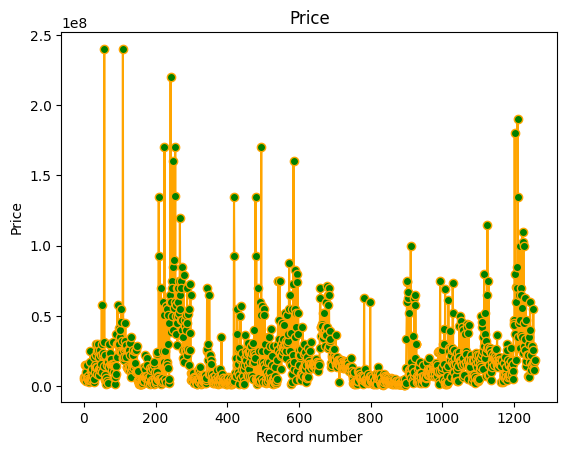

In [3]:
plt.plot(raw['Price'],color="orange",marker="o",markerfacecolor="green")
plt.title('Price')
plt.xlabel('Record number')
plt.ylabel('Price')

plt.show()

In [4]:
raw.groupby('Status').count()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Transaction,Type,Per_Sqft
Status,,,,,,,,,,
Almost_ready,75,75,75,75,75,73,75,75,75,65
Ready_to_move,1184,1184,1182,1179,1183,1153,1184,1184,1179,953


In [5]:
raw.groupby('Status')['BHK'].count()

Status
Almost_ready       75
Ready_to_move    1184
Name: BHK, dtype: int64

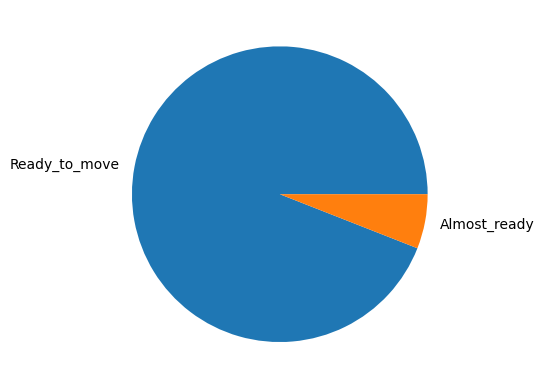

In [6]:
labels=raw['Status'].unique()
values=[1184,75]
plt.pie(values,labels=labels)
plt.show()

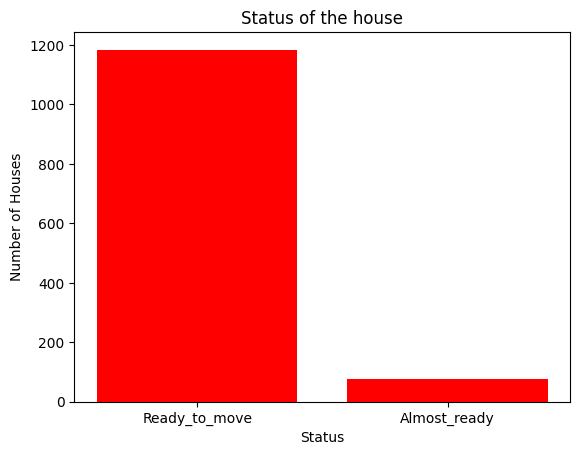

In [7]:
plt.bar(labels,values,color='red', )
plt.xlabel('Status')
plt.ylabel('Number of Houses')
plt.title('Status of the house')
plt.show()

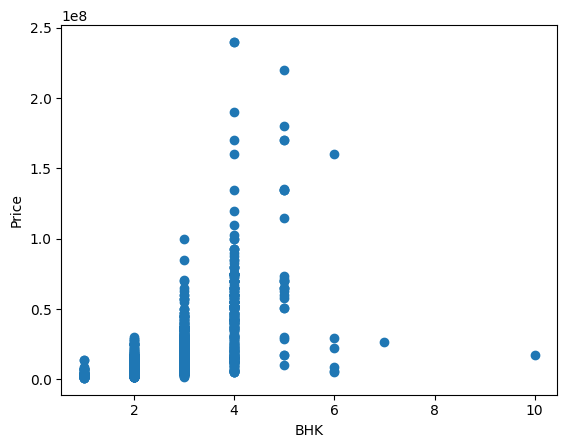

In [8]:
plt.scatter(x=raw['BHK'],y=raw['Price'])
plt.xlabel('BHK')
plt.ylabel('Price')
plt.show()

In [9]:
raw['Price'].describe()

count    1.259000e+03
mean     2.130670e+07
std      2.560115e+07
min      1.000000e+06
25%      5.700000e+06
50%      1.420000e+07
75%      2.550000e+07
max      2.400000e+08
Name: Price, dtype: float64

<Axes: ylabel='Price'>

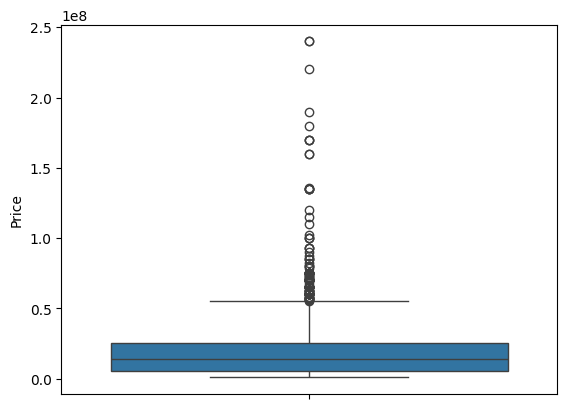

In [10]:
import seaborn as sns
sns.boxplot(raw['Price'])

<Axes: ylabel='BHK'>

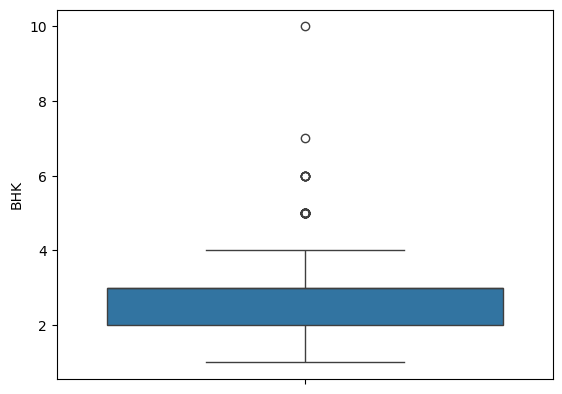

In [11]:
import seaborn as sns
sns.boxplot(raw['BHK'])

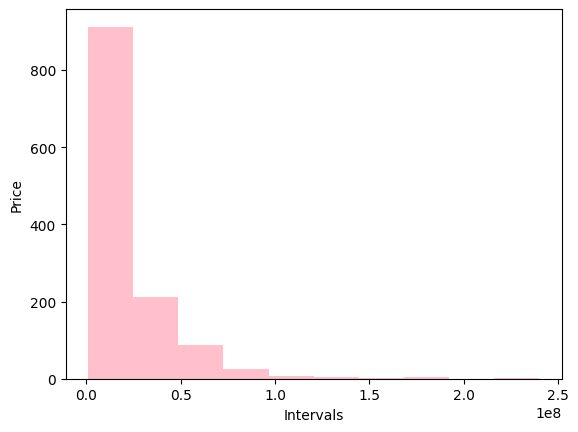

In [12]:
plt.hist(raw['Price'],bins=10, color='pink')
plt.xlabel('Intervals')
plt.ylabel('Price')

plt.show()

In [13]:
feature=['Area','BHK','Bathroom','Parking','Per_Sqft']

In [14]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='median')   # to handle the missing values of independent variable
raw[feature]=imputer.fit_transform(raw[feature])
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   float64
 2   Bathroom     1259 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1258 non-null   object 
 5   Parking      1259 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1259 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 108.3+ KB


In [15]:
column=raw['Per_Sqft'].values.reshape(-1,1)
column.shape

(1259, 1)

In [16]:
raw.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       1
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [17]:
raw.isnull().sum()/raw.shape[0]*100

Area           0.000000
BHK            0.000000
Bathroom       0.000000
Furnishing     0.397141
Locality       0.079428
Parking        0.000000
Price          0.000000
Status         0.000000
Transaction    0.000000
Type           0.397141
Per_Sqft       0.000000
dtype: float64

In [18]:
raw["Furnishing"].mode()[0]

'Semi-Furnished'

In [19]:
raw["Furnishing"].fillna(raw["Furnishing"].mode()[0])

0       Semi-Furnished
1       Semi-Furnished
2            Furnished
3       Semi-Furnished
4       Semi-Furnished
             ...      
1254       Unfurnished
1255    Semi-Furnished
1256    Semi-Furnished
1257       Unfurnished
1258       Unfurnished
Name: Furnishing, Length: 1259, dtype: object

In [20]:
raw.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       1
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [21]:
raw["Locality"].mode()[0]

'Lajpat Nagar 3'

In [22]:
raw["Locality"].fillna(raw["Locality"].mode()[0],inplace=True)

C:\Users\tg157\AppData\Local\Temp\ipykernel_21768\1522938560.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw["Locality"].fillna(raw["Locality"].mode()[0],inplace=True)


In [23]:
raw.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           5
Per_Sqft       0
dtype: int64

In [24]:
raw["Type"].mode()[0]

'Builder_Floor'

In [25]:
raw["Type"].fillna(raw["Type"].mode()[0],inplace=True)

C:\Users\tg157\AppData\Local\Temp\ipykernel_21768\3789031389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw["Type"].fillna(raw["Type"].mode()[0],inplace=True)


In [26]:
raw.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [27]:
raw["Furnishing"].mode()[0]

'Semi-Furnished'

In [28]:
raw["Furnishing"].fillna(raw["Furnishing"].mode()[0])

0       Semi-Furnished
1       Semi-Furnished
2            Furnished
3       Semi-Furnished
4       Semi-Furnished
             ...      
1254       Unfurnished
1255    Semi-Furnished
1256    Semi-Furnished
1257       Unfurnished
1258       Unfurnished
Name: Furnishing, Length: 1259, dtype: object

In [29]:
raw.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     5
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [30]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   float64
 2   Bathroom     1259 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1259 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1259 non-null   object 
 10  Per_Sqft     1259 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 108.3+ KB


In [31]:
raw.drop(columns=['Status','Transaction'],inplace=True)
raw.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3.0,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Builder_Floor,11291.5
1,750.0,2.0,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.0
2,950.0,2.0,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.0
3,600.0,2.0,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Builder_Floor,6667.0
4,650.0,2.0,2.0,Semi-Furnished,Rohini Sector 24,1.0,6200000,Builder_Floor,6667.0


In [32]:
raw['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [33]:
mapping={'Unfurnished':0,'Furnished':1,'Semi-Furnished':2}
raw['Furnishing']=raw['Furnishing'].map(mapping)

In [34]:
raw['Furnishing'].unique()

array([ 2.,  1.,  0., nan])

In [35]:
raw.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3.0,2.0,2.0,Rohini Sector 25,1.0,6500000,Builder_Floor,11291.5
1,750.0,2.0,2.0,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.0
2,950.0,2.0,2.0,1.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.0
3,600.0,2.0,2.0,2.0,Rohini Sector 24,1.0,4200000,Builder_Floor,6667.0
4,650.0,2.0,2.0,2.0,Rohini Sector 24,1.0,6200000,Builder_Floor,6667.0


In [36]:
raw["Furnishing"].mode()[0]

np.float64(2.0)

In [37]:
raw["Furnishing"].fillna(raw["Furnishing"].mode()[0])

0       2.0
1       2.0
2       1.0
3       2.0
4       2.0
       ... 
1254    0.0
1255    2.0
1256    2.0
1257    0.0
1258    0.0
Name: Furnishing, Length: 1259, dtype: float64

In [38]:
raw.isnull().sum()

Area          0
BHK           0
Bathroom      0
Furnishing    5
Locality      0
Parking       0
Price         0
Type          0
Per_Sqft      0
dtype: int64

In [39]:
from sklearn.preprocessing import OneHotEncoder
ene_data=raw[["Type"]]

In [40]:
oh = OneHotEncoder()
ar = oh.fit_transform(ene_data).toarray()

In [41]:
ar

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [42]:
x=pd.DataFrame(ar,columns=["Apartment_type","Builder_floor_type"])

In [43]:
x

,Apartment_type,Builder_floor_type
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1254,0.0,1.0
1255,0.0,1.0
1256,0.0,1.0
1257,0.0,1.0


In [44]:
data1 = pd.concat([raw,x],axis=1)

In [45]:
data1.drop(columns=["Type"],inplace=True)

In [46]:
data1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Per_Sqft,Apartment_type,Builder_floor_type
0,800.0,3.0,2.0,2.0,Rohini Sector 25,1.0,6500000,11291.5,0.0,1.0
1,750.0,2.0,2.0,2.0,"J R Designers Floors, Rohini Sector 24",1.0,5000000,6667.0,1.0,0.0
2,950.0,2.0,2.0,1.0,"Citizen Apartment, Rohini Sector 13",1.0,15500000,6667.0,1.0,0.0
3,600.0,2.0,2.0,2.0,Rohini Sector 24,1.0,4200000,6667.0,0.0,1.0
4,650.0,2.0,2.0,2.0,Rohini Sector 24,1.0,6200000,6667.0,0.0,1.0


In [47]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
raw['Locality'] = label_encoder.fit_transform(raw['Locality'])

In [48]:
raw.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3.0,2.0,2.0,271,1.0,6500000,Builder_Floor,11291.5
1,750.0,2.0,2.0,2.0,135,1.0,5000000,Apartment,6667.0
2,950.0,2.0,2.0,1.0,47,1.0,15500000,Apartment,6667.0
3,600.0,2.0,2.0,2.0,270,1.0,4200000,Builder_Floor,6667.0
4,650.0,2.0,2.0,2.0,270,1.0,6200000,Builder_Floor,6667.0


In [49]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        1259 non-null   float64
 1   BHK         1259 non-null   float64
 2   Bathroom    1259 non-null   float64
 3   Furnishing  1254 non-null   float64
 4   Locality    1259 non-null   int64  
 5   Parking     1259 non-null   float64
 6   Price       1259 non-null   int64  
 7   Type        1259 non-null   object 
 8   Per_Sqft    1259 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 88.7+ KB


In [50]:
raw["Furnishing"].mode()[0]

np.float64(2.0)

In [51]:
raw["Furnishing"].fillna(raw["Furnishing"].mode()[0])

0       2.0
1       2.0
2       1.0
3       2.0
4       2.0
       ... 
1254    0.0
1255    2.0
1256    2.0
1257    0.0
1258    0.0
Name: Furnishing, Length: 1259, dtype: float64

In [52]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        1259 non-null   float64
 1   BHK         1259 non-null   float64
 2   Bathroom    1259 non-null   float64
 3   Furnishing  1254 non-null   float64
 4   Locality    1259 non-null   int64  
 5   Parking     1259 non-null   float64
 6   Price       1259 non-null   int64  
 7   Type        1259 non-null   object 
 8   Per_Sqft    1259 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 88.7+ KB


In [53]:
raw1=raw.dropna()

In [54]:
raw1.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3.0,2.0,2.0,271,1.0,6500000,Builder_Floor,11291.5
1,750.0,2.0,2.0,2.0,135,1.0,5000000,Apartment,6667.0
2,950.0,2.0,2.0,1.0,47,1.0,15500000,Apartment,6667.0
3,600.0,2.0,2.0,2.0,270,1.0,4200000,Builder_Floor,6667.0
4,650.0,2.0,2.0,2.0,270,1.0,6200000,Builder_Floor,6667.0


In [55]:
raw1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        1254 non-null   float64
 1   BHK         1254 non-null   float64
 2   Bathroom    1254 non-null   float64
 3   Furnishing  1254 non-null   float64
 4   Locality    1254 non-null   int64  
 5   Parking     1254 non-null   float64
 6   Price       1254 non-null   int64  
 7   Type        1254 non-null   object 
 8   Per_Sqft    1254 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 98.0+ KB


In [56]:
raw1.to_csv('Housing_Data_Delhi_Final.csv',index=False)

In [57]:
data = pd.read_csv('Housing_Data_Delhi_Final.csv')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        1254 non-null   float64
 1   BHK         1254 non-null   float64
 2   Bathroom    1254 non-null   float64
 3   Furnishing  1254 non-null   float64
 4   Locality    1254 non-null   int64  
 5   Parking     1254 non-null   float64
 6   Price       1254 non-null   int64  
 7   Type        1254 non-null   object 
 8   Per_Sqft    1254 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 88.3+ KB


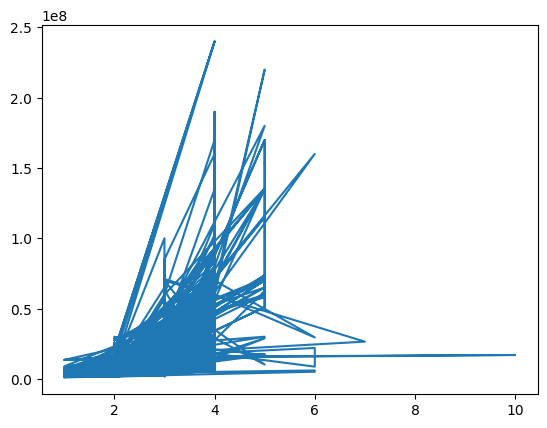

In [59]:
plt.plot(raw['BHK'],raw['Price'])
plt.show()

In [60]:
from sklearn.tree import DecisionTreeRegressor
y=data['Price']
X=data[feature]
data_model=DecisionTreeRegressor(random_state=1)  # define the model and initialize the random state
data_model.fit(X,y) # fit the model

DecisionTreeRegressor(random_state=1)

In [61]:
print("Making predictions for the following 5 houses:")
print(X.head(40))
print("The predictions are")
print(data_model.predict(X.head(40)))

Making predictions for the following 5 houses:
         Area  BHK  Bathroom  Parking  Per_Sqft
0    800.0000  3.0       2.0      1.0   11291.5
1    750.0000  2.0       2.0      1.0    6667.0
2    950.0000  2.0       2.0      1.0    6667.0
3    600.0000  2.0       2.0      1.0    6667.0
4    650.0000  2.0       2.0      1.0    6667.0
5   1300.0000  4.0       3.0      1.0    6667.0
6   1350.0000  4.0       3.0      1.0    6667.0
7    650.0000  2.0       2.0      1.0    6154.0
8    985.0000  3.0       3.0      1.0    6154.0
9   1300.0000  4.0       4.0      1.0    6154.0
10  1100.0000  3.0       2.0      1.0    6154.0
11   870.0000  3.0       2.0      1.0    6154.0
12   630.0000  2.0       2.0      1.0    6154.0
13   660.0000  2.0       2.0      1.0    6154.0
14   344.4448  2.0       2.0      1.0    6154.0
15   660.0000  2.0       2.0      1.0    6154.0
16   550.0000  2.0       2.0      1.0    6154.0
17  1100.0000  4.0       3.0      1.0    6154.0
18  1150.0000  3.0       3.0      1.0    

In [62]:
np.corrcoef(data['Price'],data['Area'])

array([[1.        , 0.58100909],
       [0.58100909, 1.        ]])

In [63]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3.0,2.0,2.0,271,1.0,6500000,Builder_Floor,11291.5
1,750.0,2.0,2.0,2.0,135,1.0,5000000,Apartment,6667.0
2,950.0,2.0,2.0,1.0,47,1.0,15500000,Apartment,6667.0
3,600.0,2.0,2.0,2.0,270,1.0,4200000,Builder_Floor,6667.0
4,650.0,2.0,2.0,2.0,270,1.0,6200000,Builder_Floor,6667.0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        1254 non-null   float64
 1   BHK         1254 non-null   float64
 2   Bathroom    1254 non-null   float64
 3   Furnishing  1254 non-null   float64
 4   Locality    1254 non-null   int64  
 5   Parking     1254 non-null   float64
 6   Price       1254 non-null   int64  
 7   Type        1254 non-null   object 
 8   Per_Sqft    1254 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 88.3+ KB


In [65]:
data.describe()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Per_Sqft
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03,1254.000000
mean,1467.443365,2.795056,2.556619,1.275120,176.358054,1.914673,2.133711e+07,14787.524721
std,1570.540033,0.953981,1.043155,0.882608,98.530116,6.210196,2.564346e+07,19038.706238
min,28.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,0.000000,98.000000,1.000000,5.700000e+06,6714.000000
50%,1200.000000,3.000000,2.000000,2.000000,167.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,265.750000,2.000000,2.580000e+07,15459.000000
max,24300.000000,10.000000,7.000000,2.000000,344.000000,114.000000,2.400000e+08,183333.000000


<function matplotlib.pyplot.show(close=None, block=None)>

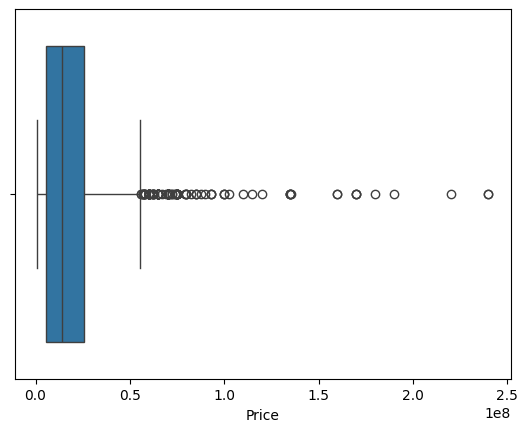

In [66]:
sns.boxplot(x="Price",data=data)
plt.show

C:\Users\tg157\AppData\Local\Temp\ipykernel_21768\1600148.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Price"])


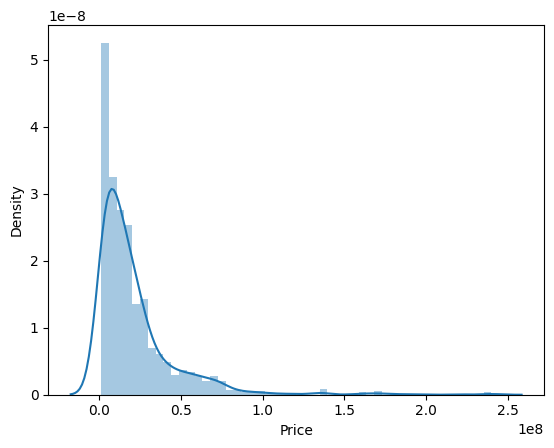

In [67]:
sns.distplot(data["Price"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

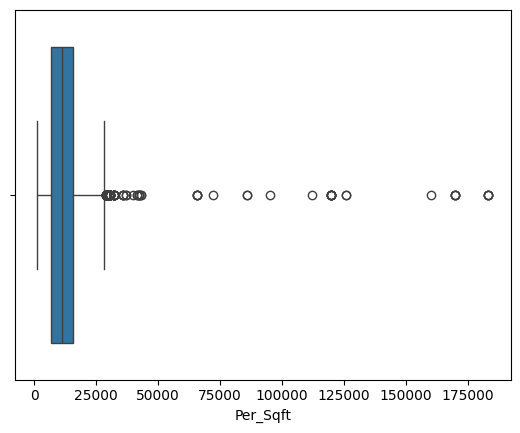

In [68]:
sns.boxplot(x="Per_Sqft",data=data)
plt.show

C:\Users\tg157\AppData\Local\Temp\ipykernel_21768\2755975843.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Per_Sqft"])


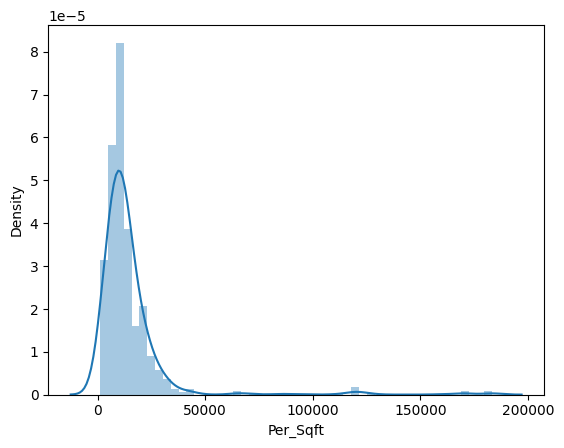

In [69]:
sns.distplot(data["Per_Sqft"])
plt.show()

In [70]:
data.shape

(1254, 9)

In [71]:
q1=data["Price"].quantile(0.25)
q1

np.float64(5700000.0)

In [72]:
q3=data["Price"].quantile(0.75)
q3

np.float64(25800000.0)

In [73]:
IQR = q3 - q1

In [74]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range , max_range

(np.float64(-24450000.0), np.float64(55950000.0))

In [75]:
new_data = data[data["Price"]<=max_range]
new_data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3.0,2.0,2.0,271,1.0,6500000,Builder_Floor,11291.5
1,750.0,2.0,2.0,2.0,135,1.0,5000000,Apartment,6667.0
2,950.0,2.0,2.0,1.0,47,1.0,15500000,Apartment,6667.0
3,600.0,2.0,2.0,2.0,270,1.0,4200000,Builder_Floor,6667.0
4,650.0,2.0,2.0,2.0,270,1.0,6200000,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...
1249,4118.0,4.0,5.0,0.0,43,3.0,55000000,Builder_Floor,12916.0
1250,1050.0,3.0,2.0,2.0,43,3.0,12500000,Builder_Floor,12916.0
1251,875.0,3.0,3.0,2.0,43,3.0,17500000,Builder_Floor,12916.0
1252,990.0,2.0,2.0,0.0,45,1.0,11500000,Builder_Floor,12916.0


In [76]:
q2=data["Per_Sqft"].quantile(0.25)
q2

np.float64(6714.0)

In [77]:
q4=data["Per_Sqft"].quantile(0.75)
q4

np.float64(15459.0)

In [78]:
IQR1 = q4 - q2

In [79]:
mn_range = q2 - (1.5*IQR)
mx_range = q4 + (1.5*IQR)
mn_range , mx_range

(np.float64(-30143286.0), np.float64(30165459.0))

In [80]:
new_data = data[data["Per_Sqft"]<=mx_range]
new_data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3.0,2.0,2.0,271,1.0,6500000,Builder_Floor,11291.5
1,750.0,2.0,2.0,2.0,135,1.0,5000000,Apartment,6667.0
2,950.0,2.0,2.0,1.0,47,1.0,15500000,Apartment,6667.0
3,600.0,2.0,2.0,2.0,270,1.0,4200000,Builder_Floor,6667.0
4,650.0,2.0,2.0,2.0,270,1.0,6200000,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...
1249,4118.0,4.0,5.0,0.0,43,3.0,55000000,Builder_Floor,12916.0
1250,1050.0,3.0,2.0,2.0,43,3.0,12500000,Builder_Floor,12916.0
1251,875.0,3.0,3.0,2.0,43,3.0,17500000,Builder_Floor,12916.0
1252,990.0,2.0,2.0,0.0,45,1.0,11500000,Builder_Floor,12916.0


In [81]:
new_data.isnull().sum()

Area          0
BHK           0
Bathroom      0
Furnishing    0
Locality      0
Parking       0
Price         0
Type          0
Per_Sqft      0
dtype: int64

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        1254 non-null   float64
 1   BHK         1254 non-null   float64
 2   Bathroom    1254 non-null   float64
 3   Furnishing  1254 non-null   float64
 4   Locality    1254 non-null   int64  
 5   Parking     1254 non-null   float64
 6   Price       1254 non-null   int64  
 7   Type        1254 non-null   object 
 8   Per_Sqft    1254 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 88.3+ KB


In [83]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        1254 non-null   float64
 1   BHK         1254 non-null   float64
 2   Bathroom    1254 non-null   float64
 3   Furnishing  1254 non-null   float64
 4   Locality    1254 non-null   int64  
 5   Parking     1254 non-null   float64
 6   Price       1254 non-null   int64  
 7   Type        1254 non-null   object 
 8   Per_Sqft    1254 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 88.3+ KB


In [84]:
# Applying Linear Regression

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [87]:
print(X_train.shape)
print(X_test.shape)

(1003, 5)
(251, 5)


In [88]:
X_train.head()

,Area,BHK,Bathroom,Parking,Per_Sqft
159,500.0,2.0,1.0,1.0,4000.0
764,900.0,3.0,2.0,1.0,3714.0
1140,1800.0,3.0,3.0,2.0,11291.5
1084,1600.0,3.0,4.0,1.0,10556.0
1236,2430.0,4.0,4.0,5.0,18333.0


In [89]:
scaler = StandardScaler()

In [90]:
lr = LinearRegression()

In [91]:
pipe = make_pipeline(scaler, lr)

In [92]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [93]:
y_pred_lr = pipe.predict(X_test)
y_pred_lr[:10]

array([2.48673229e+07, 3.91628725e+03, 2.97049552e+07, 1.12984275e+07,
       2.64938885e+07, 2.40241266e+07, 2.73107695e+07, 3.44144941e+07,
       9.93452992e+06, 1.07972538e+07])

In [94]:
r2_score(y_test, y_pred_lr)

0.6305969498448663

In [95]:
#lasso

In [96]:
lasso = Lasso()

In [97]:
pipe = make_pipeline(scaler,lasso)

In [98]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [99]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lr)

0.6305969498448663

In [100]:
#Ridge

In [101]:
ridge = Ridge()

In [102]:
pipe = make_pipeline(scaler,ridge)

In [103]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [104]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test, y_pred_lr)

0.6305969498448663

In [105]:
print("No Regularization: ",r2_score(y_test, y_pred_lr))
print("Lasso: ",r2_score(y_test, y_pred_lasso))
print("Ridge: ",r2_score(y_test, y_pred_ridge))



No Regularization:  0.6305969498448663
Lasso:  0.6305969800744059
Ridge:  0.6306614804051074


In [106]:
import pickle

In [107]:
pickle.dump(pipe, open('RidgeModel.pkl','wb'))

In [108]:
import json
columns={
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns,json","w") as f:
    f.write(json.dumps(columns))